# Boston housing
  
#### Problem explanation:

The Boston housing data set is a data set that has median value of the house along with 13 other parameters that could potentially be related to housing prices. These are the factors such as socio-economic conditions, environmental conditions, educational facilities and some other similar factors. There are 506 observations in the data for 14 variables including the median price of house in Boston. There are 12 numerical variables in our dataset and 1 categorical variable. The aim of this project is to build a model estimate the median price of owner-occupied homes in Boston.

Data set is used in Regression Diagnostics-Identifying Influential Data and Sources of Collinearity 1980 by the Belsley D.A. and Welsch R.E. and in Hedonic prices and the demand for clean air 1978 by the Harrison D. and Rubinfeld D.L. The data set itself is located here, in the field Data.

This is regression problem and the result is one output which presents median value of owner-occupied homes in 1000’s dollars.

Model inputs are:
* Crim – per capita crime rate by town,
* Zn – proportion of residential land zoned for lots over 25000 square feet,
* Indus – proportion of non-retail business acres per town,
* Chas  – Charles River dummy variable (1 if tract bounds river; 0 otherwise),
* Nox – nitric oxides concentration (parts per 10 million),
* Rm – average number of rooms per dwelling,
* Age - proportion of owner-occupied units built prior to 1940,
* Dis - weighted distances to five Boston employment centres,
* Rad – index of accessibility to radial highways,
* Tax – full-value property-tax rate per 10000 dollars,
* Ptratio – pupil-teacher ratio by town,
* Black –1000(Bk - 0.63)2 where Bk is the proportion of black people by town,
* Lstat - % lower status of the population.

#### Problem solution:
Data set is relatively small, it contains 506 observations.  We have divided the data set in two sets, training set, which contains 404 observations and test set, which contains 102 observations. We solved problem in two ways:

* Manually buiilding ANN,
* Employing Black Fox service.

We evaluate the performance of the models using K-fold cross validation. For the purpose of feature scaling, we apply a min max scaler. To stop the training at the right time, Keras' early stopping scheme is applied.

### Update Keras to latest version:

In [1]:
!pip install keras==2.2.4

# Data preprocessing
#### Importing data frame

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the date as data frame wich we will import with pandas using the read_csv function.
dataframe = pd.read_csv('Boston_dataset.csv')

#### Dataset info

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


#### Dataset description

In [4]:
dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Histograms of the numerical features

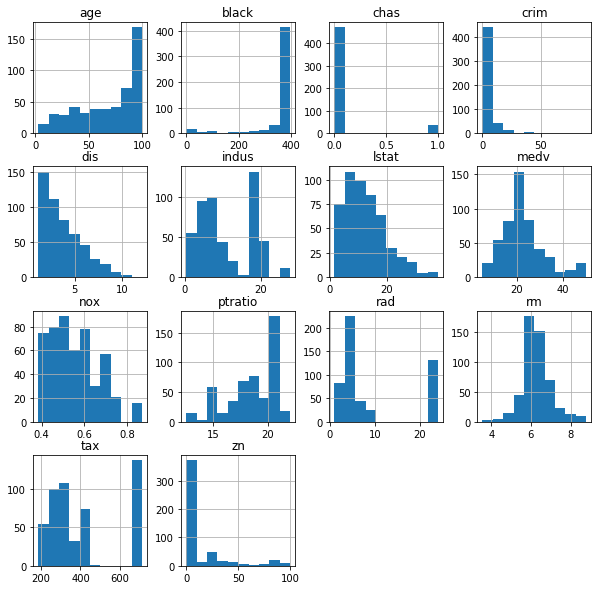

In [5]:
dataframe.hist(figsize=(10,10));

#### Corelation heatmap

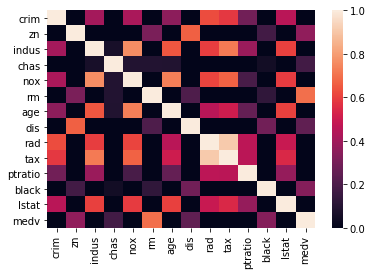

In [6]:
sns.heatmap(dataframe.corr(), vmin=0, vmax=1);

####  Separate the data frame into feature matrix X and dependent variable y

In [7]:
X = dataframe.iloc[:, 0:13].values
y = dataframe.iloc[:, 13:14].values

#### Split the entire data set into the training set and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Apply the feature scaling because we don't wanna have any feature dominating another feature

In [9]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

mms_X = MinMaxScaler()
X_train_minMaxScaled = mms_X.fit_transform(X_train)
X_test_minMaxScaled = mms_X.transform(X_test)

mms_y = MinMaxScaler()
y_train_minMaxScaled = mms_y.fit_transform(y_train)
y_test_minMaxScaled = mms_y.transform(y_test)

# Option 1 - manually build ANN using Keras

In [10]:
# Importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint
from keras.callbacks import EarlyStopping

import time
start1 = time.time()

classifier = Sequential()
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 13))
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'auto',
                   min_delta = 0,
                   patience = 150,
                   verbose = 1,
                   #baseline=0.4,
                   restore_best_weights = True
                  )
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error')
classifier.fit(x = X_train_minMaxScaled, y = y_train_minMaxScaled, validation_split = 0.3, batch_size = 32, epochs = 3000, callbacks = [es], verbose=1)

end1 = time.time()

time1 = int(end1-start1)
minutes1, seconds1= divmod(time1, 60)
hours1, minutes1= divmod(minutes1, 60)

Using TensorFlow backend.


Train on 282 samples, validate on 122 samples
Epoch 1/3000
282/282 [==============================] - 2s 6ms/step - loss: 0.1893 - val_loss: 0.2063
Epoch 2/3000
282/282 [==============================] - 0s 137us/step - loss: 0.1824 - val_loss: 0.1995
Epoch 3/3000
282/282 [==============================] - 0s 140us/step - loss: 0.1755 - val_loss: 0.1931
.
.
.


Epoch 2997/3000
282/282 [==============================] - 0s 106us/step - loss: 0.0509 - val_loss: 0.0621
Epoch 2998/3000
282/282 [==============================] - 0s 131us/step - loss: 0.0505 - val_loss: 0.0621
Epoch 2999/3000
282/282 [==============================] - 0s 145us/step - loss: 0.0505 - val_loss: 0.0620
Epoch 3000/3000
282/282 [==============================] - 0s 121us/step - loss: 0.0505 - val_loss: 0.0619


#### Plot loss during training

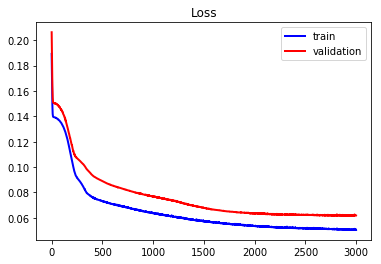

In [11]:
plt.title('Loss')
plt.plot(classifier.history.history['loss'], label = 'train', color = 'blue', linewidth=2)
plt.plot(classifier.history.history['val_loss'], label = 'validation', color = 'red', linewidth=2)
plt.legend()
plt.show()

#### We just trained our artificial neural network on the training set and now it's time to make the prediction on the test set

In [12]:
y_pred = classifier.predict(X_test_minMaxScaled)
print("First 6 predicted scaled results are:\n", y_pred[:6,:])

First 6 predicted scaled results are:
 [[0.5606063 ]
 [0.43006495]
 [0.28793135]
 [0.37438512]
 [0.26951233]
 [0.32528967]]


#### Restoring the results on real values:

In [13]:
y_pred_realValues = mms_y.inverse_transform(y_pred)
print("First 6 real test values are:\n", y_pred_realValues[:6,:])
print("First 6 real test values are:\n", y_test[:6,:])

First 6 real test values are:
 [[30.227283]
 [24.352924]
 [17.956911]
 [21.84733 ]
 [17.128054]
 [19.638035]]
First 6 real test values are:
 [[28.2]
 [23.9]
 [16.6]
 [22. ]
 [20.8]
 [23. ]]


#### Compute error

In [14]:
t1=y_pred_realValues - y_test
t2=np.square(t1)
t3=t2.sum()
t4=t3/(102*1)

t_max = np.max(y_test)
t_min = np.min(y_test)

Rmse1 = np.sqrt(t4)
Prmse1 = 100*(Rmse1/(t_max - t_min))

print("\nTime needed for tuning is ", time1,"seconds(",hours1,"hours,",minutes1,"minutes and ",seconds1,"seconds).")
print("\nRoot mean square error (Medv) =", Rmse1)
print("\nPercentage root mean square error (Medv) =", Prmse1)


Time needed for tuning is  169 seconds( 0 hours, 2 minutes and  49 seconds).

Root mean square error (Medv) = 4.044688236981178

Percentage root mean square error (Medv) = 9.255579489659445


#### Visualisation:

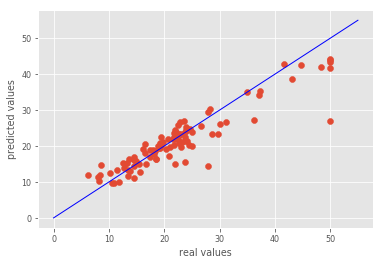

In [39]:
plt.scatter(y_test,y_pred_realValues)
plt.xlabel('real values')
plt.ylabel('predicted values')
_=plt.plot([0,55],[0,55], c="b")

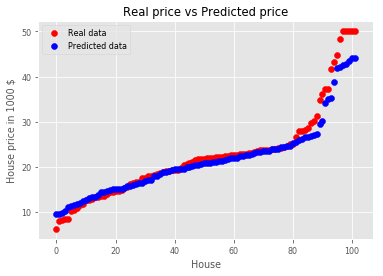

In [34]:
house=np.arange(0, y_test.shape[0]).reshape(y_test.shape[0],1)
plt.scatter(house,np.sort(y_test.reshape(y_test.shape[0],)), color = 'red', label = 'Real data')
plt.scatter(house, np.sort(y_pred_realValues.reshape(y_test.shape[0],)), color = 'blue', label = 'Predicted data')
plt.title('Real price vs Predicted price')
plt.xlabel('House')
plt.ylabel('House price in 1000 $')
plt.legend(loc = 'upper left')
plt.show()

# Option 2 - Optimize ANN using Black Fox service

#### Install Black fox service

In [17]:
!pip install git+https://github.com/tmrdja/BlackFoxPython.git

  Cloning https://github.com/tmrdja/BlackFoxPython.git to /tmp/pip-req-build-sa98_hvs
  Stored in directory: /tmp/pip-ephem-wheel-cache-iymnhfo5/wheels/46/d5/ca/47789f92af70d12cb6fc5f0c752e911491b82477816f26da21
Successfully built blackfox


#### Let's run the Black Fox service to find best ANN for the specific problem. Note that we optimize the architecture, as well!

In [18]:
#BF service
from blackfox import BlackFox
from blackfox import KerasOptimizationConfig
from blackfox import OptimizationEngineConfig
import h5py
#from keras.models import load_model
#import numpy as np
#import pandas as pd

blackfox_url = 'http://147.91.204.14:32701'
bf = BlackFox(blackfox_url)

ec = OptimizationEngineConfig(proc_timeout_miliseconds=2000000, population_size=50, max_num_of_generations=20)
c = KerasOptimizationConfig(engine_config=ec, max_epoch = 3000, validation_split=0.3)

import time
start3 = time.time()

# Use CTRL + C to stop optimization
(ann_io, ann_info, ann_metadata) = bf.optimize_keras_sync(
    input_set = X_train,
    output_set = y_train,
    config = c,
    integrate_scaler=False,
    network_path='OptimizedANNBoston_final.h5'
)

end3 = time.time()
time3 = int(end3-start3)

print('\nann info:')
print(ann_info)

print('\nann metadata:')
print(ann_metadata)

Use CTRL + C to stop optimization
Uploading data set
Starting...
2019-03-29 07:35:40.804256 -> Active, Generation: 0/20, Validation set error: 0.000000, Training set error: 0.000000, Epoch: 0, Optimization Id: 314edeae-b9a7-4391-85c5-304942833297
2019-03-29 07:39:32.531283 -> Active, Generation: 1/20, Validation set error: 0.058012, Training set error: 0.059058, Epoch: 1325, Optimization Id: 314edeae-b9a7-4391-85c5-304942833297
.
.
.


2019-03-29 07:55:17.990587 -> Active, Generation: 19/20, Validation set error: 0.046831, Training set error: 0.037376, Epoch: 1247, Optimization Id: 314edeae-b9a7-4391-85c5-304942833297
2019-03-29 07:55:23.498422 -> Finished, Generation: 20/20, Validation set error: 0.047627, Training set error: 0.043440, Epoch: 445, Optimization Id: 314edeae-b9a7-4391-85c5-304942833297
stopped Finished


Saving network 5d184b8e1e23b8f81bdba1e94933469feda9107d to OptimizedANNBoston_final.h5

ann info:
{'dropout': 0.01,
 'hidden_layers': [{'activation_function': 'ReLu', 'neuron_count': 10},
                   {'activation_function': 'ReLu', 'neuron_count': 10},
                   {'activation_function': 'ReLu', 'neuron_count': 10}],
 'id': '5d184b8e1e23b8f81bdba1e94933469feda9107d',
 'output_layer_activation_function': 'ReLu',
 'training_algorithm': 'RMSprop'}

ann metadata:
{'__version': 1, 'is_scaler_integrated': False, 'scaler_config': {'input': {'feature_range': [0, 1], 'fit': [[0.00632, 0.0, 0.46, 0.0, 0.385, 3.5610000000000004, 2.9, 1.1296, 1.0, 187.0, 12.6, 0.32, 1.73], [88.9762, 100.0, 27.74, 1.0, 0.871, 8.78, 100.0, 12.1265, 24.0, 711.0, 22.0, 396.9, 37.97]], 'inverse_transform': False}, 'output': {'feature_range': [0, 1], 'fit': [[5.0], [50.0]], 'inverse_transform': True}}, 'scaler_name': 'MinMaxScaler'}


#### The data set passed to the Black Fox service was not scaled since Black Fox scales inputs automatically. In order to apply obtained ANN in prediction, BlackFox offers the utility function to scale our test set the same way.

In [19]:
# Get metadata
meta = bf.get_metadata('OptimizedANNBoston_final.h5')
scaler_config = meta['scaler_config']

# Scale
x_scaler_config = scaler_config['input']
from sklearn.preprocessing import MinMaxScaler 
min_max_x = MinMaxScaler(feature_range=x_scaler_config['feature_range'])
min_max_x.fit(x_scaler_config['fit'])

X_test_minMaxScaled_withBF = min_max_x.transform(X_test)
#print(X_test_minMaxScaled_withBF[:10,:])

#### Prediction using ANN proposed by Black Fox

In [20]:
# Importing ANN model
from keras.models import load_model
model = load_model('OptimizedANNBoston_final.h5')

# Prediction
y_pred_BF=model.predict(X_test_minMaxScaled_withBF)
print("Prediktovane BF vrednosti su:\n\n", y_pred_BF[:10,:])

Prediktovane BF vrednosti su:

 [[0.5140095 ]
 [0.4982071 ]
 [0.2846269 ]
 [0.324078  ]
 [0.27151382]
 [0.31284016]
 [0.49799612]
 [0.22368902]
 [0.34022993]
 [0.40406382]]


#### Rescale

In [21]:
# Rescale
y_scaler_config = scaler_config['output']
min_max_y = MinMaxScaler(feature_range=y_scaler_config['feature_range'])
min_max_y.fit(y_scaler_config['fit'])

y_pred_BF_realValues = min_max_y.inverse_transform(y_pred_BF)
#print("\nFirst 6 real predicted values are:\n", y_pred_BF_realValues[:6,:])

#y_pred_BF_realValues = mms_y.inverse_transform(y_pred_BF)
#print("\nFirst 6 real predicted values are:\n", y_pred_BF_realValues[:6,:])

#### Compute error

In [22]:
t1=np.abs(y_pred_BF_realValues - y_test)
t2=np.square(t1)
t3=t2.sum()
t4=t3/(102*1)

t_max = np.max(y_test)
t_min = np.min(y_test)
t_max_pred = np.max(y_pred_BF)
t_min_pred = np.min(y_pred_BF)

Rmse3 = np.sqrt(t4)
Prmse3 = 100*(Rmse3/(t_max - t_min))

minutes3, seconds3= divmod(time3, 60)
hours3, minutes3= divmod(minutes3, 60)
print("Time for finding the best ANN by Black Fox service is ", time3,"seconds(",hours3,"hours,",minutes3,"minutes and ",seconds3,"seconds).")
print("\nRoot mean square error (Medv) = ", Rmse3)
print("\nPercentage root mean square error (Medv) = ", Prmse3)

Time for finding the best ANN by Black Fox service is  1191 seconds( 0 hours, 19 minutes and  51 seconds).

Root mean square error (Medv) =  3.938152738646182

Percentage root mean square error (Medv) =  9.011791163950072


#### Visualization:

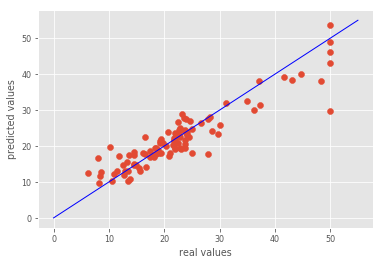

In [38]:
plt.scatter(y_test,y_pred_BF_realValues)
plt.xlabel('real values')
plt.ylabel('predicted values')
_=plt.plot([0,55],[0,55], c="b")

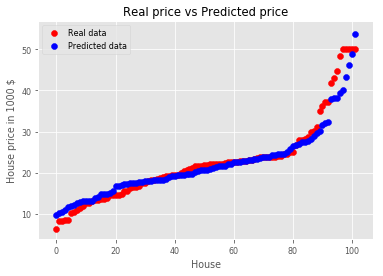

In [32]:
house=np.arange(0, y_test.shape[0]).reshape(y_test.shape[0],1)
plt.scatter(house,np.sort(y_test.reshape(y_test.shape[0],)), color = 'red', label = 'Real data')
plt.scatter(house, np.sort(y_pred_BF_realValues.reshape(y_test.shape[0],)), color = 'blue', label = 'Predicted data')
plt.title('Real price vs Predicted price')
plt.xlabel('House')
plt.ylabel('House price in 1000 $')
plt.legend(loc = 'upper left')
plt.show()

# RESULTS AND DISCUSSION

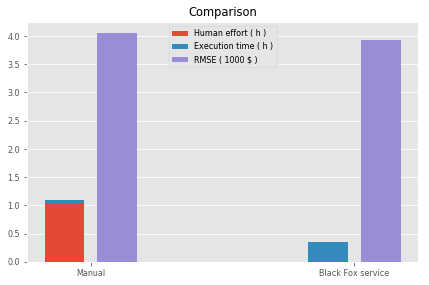

In [33]:
plt.style.use('ggplot')
mpl.rc('lines', linewidth=1)
mpl.rc('font', size='8')

n_groups = 2
group_1 = (Human_time1/3600, Human_time3/3600)
group_2 = (time1/3600, time3/3600)
group_3 = (errorOnTestSetTrained, errorOnTestSetBF)
 
fig, ax = plt.subplots()
ax.xaxis.grid(False)
index = np.arange(n_groups)
bar_width = 0.15
space = 0.05
opacity = 1
  

rects1 = plt.bar(index, group_1, bar_width,
alpha=opacity,
label='Human effort ( h )')

rects2 = plt.bar(index, group_2, bar_width,bottom =group_1,
alpha=opacity,
label='Execution time ( h )')

rects3 = plt.bar(index + bar_width+space, group_3, bar_width,
alpha=opacity,
label='RMSE ( 1000 $ )')


plt.title('Comparison')
plt.xticks(index + (bar_width/2 + space/2), ('Manual', 'Black Fox service'))
plt.legend(loc = 'upper center')
 
plt.tight_layout()
plt.show()

#### Although we measured this three options, actually they are not so comparable, because in Python we had a man sitting in office and programming those neural networks (options 1 and 2) while in Black Fox service (option 3), he imported the same data set and the service did the rest, while he went to rest or dring coffe, for example, so actually, in Black Fox service he wrote few lines of code and thats all of hard work. Results in the given plots above speak for themself. As you can see, Black Fox service gave better results in less time and effort to create approximate results in Python as Black Fox did is immeasurably large.